目前使用LOP為定義之實驗數據採用18筆，加上Mean

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre
from scipy import stats

In [2]:
# TIP = pd.read_csv(os.path.join("/root/LR_ML", "0507.xlsx"))
# TIP = pd.read_excel('0507.xlsx', index_col=None)
# TIP = pd.read_csv(os.path.join('/root/LR_ML', 'Data_Sorted.csv'), error_bad_lines=False)
os.getcwd()

'/root/LR_ML'

In [3]:
datafile = u"/root/LR_ML/newData_mean1.xlsx"
TIP0 = pd.read_excel(datafile)

In [4]:
TIP = pd.DataFrame(TIP0)

In [5]:
TIP.head()

,SBPI,SBPL,SBPM,DBPI,DBPL,DBPM,BPMI,BPML,BPMM,LOP,NOTE
0,133,140,136.5,85,88,86.5,83,94,88.5,140.0,NaN
1,135,128,131.5,89,92,90.5,92,90,91.0,140.0,NaN
2,113,110,111.5,64,68,66.0,70,75,72.5,120.0,NaN
3,116,118,117.0,73,71,72.0,72,77,74.5,120.0,NaN
4,114,123,118.5,71,73,72.0,83,78,80.5,120.0,NaN


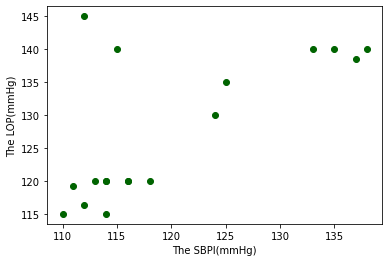

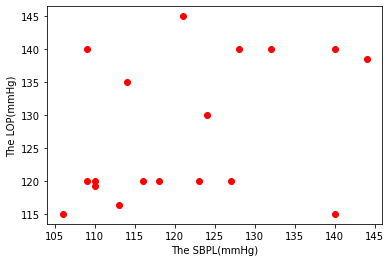

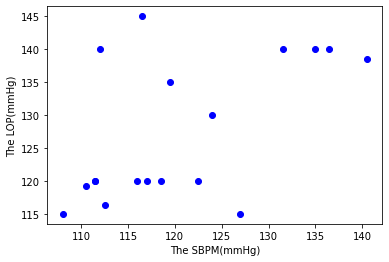

In [6]:
modTIP = TIP.drop(['NOTE'], axis = 1)
#繪製散點圖,examDf.jt爲X軸，examDf.hk爲Y軸
plt.scatter(modTIP.SBPI,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
#添加圖的標籤（x軸，y軸）
plt.xlabel("The SBPI(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
plt.scatter(modTIP.SBPL,modTIP.LOP,color = 'red',label = "Exam Data")
plt.xlabel("The SBPL(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像
plt.scatter(modTIP.SBPM,modTIP.LOP,color = 'blue',label = "Exam Data")
plt.xlabel("The SBPM(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

             SBPI        SBPL        SBPM       DBPI       DBPL       DBPM  \
count   18.000000   18.000000   18.000000  18.000000  18.000000  18.000000   
mean   119.833333  121.333333  120.583333  76.277778  73.555556  74.916667   
std      9.623806   11.807276    9.862660  11.118641  10.106621   9.248609   
min    110.000000  106.000000  108.000000  62.000000  60.000000  64.000000   
25%    113.250000  110.750000  112.125000  68.500000  66.500000  66.125000   
50%    115.500000  119.500000  117.750000  72.000000  72.000000  72.250000   
75%    124.750000  127.750000  126.250000  84.750000  78.250000  80.875000   
max    138.000000  144.000000  140.500000  99.000000  92.000000  92.500000   

             BPMI       BPML        BPMM         LOP  
count   18.000000  18.000000   18.000000   18.000000  
mean    81.277778  79.111111   80.194444  127.450000  
std     11.333478   9.541790   10.106985   10.730345  
min     65.000000  64.000000   64.500000  115.000000  
25%     73.000000  74.

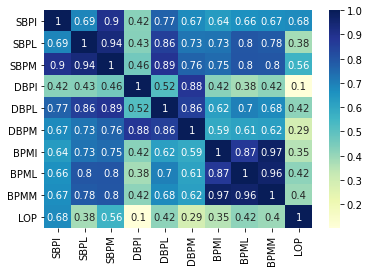

In [7]:
print(modTIP.describe())
rDf = modTIP.corr()#查看數據間的相關係數
print(rDf)
sns.heatmap(modTIP.corr(),annot=True, cmap="YlGnBu")

In [8]:
def t_test(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1)
    std2 = np.std(group2)
    nobs1 = len(group1)
    nobs2 = len(group2)
    
    modified_std1 = np.sqrt(np.float32(nobs1)/
                    np.float32(nobs1-1)) * std1
    modified_std2 = np.sqrt(np.float32(nobs2)/
                    np.float32(nobs2-1)) * std2
    (statistic, pvalue) = stats.ttest_ind_from_stats( 
               mean1=mean1, std1=modified_std1, nobs1=nobs1,   
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )
    return statistic, pvalue

In [23]:
print(t_test(modTIP.SBPI, modTIP.SBPL))#(-0.4177880011528565, 0.6787289200688578)
print(t_test(modTIP.SBPI, modTIP.SBPM))#(-0.23091214514821012, 0.8187669737773039)
print(t_test(modTIP.SBPL, modTIP.SBPM))#(0.20682984119562073, 0.8373764538614932)
print(t_test(modTIP.DBPI, modTIP.DBPL))#(0.7686499983173284, 0.4474076842818837)
print(t_test(modTIP.DBPI, modTIP.DBPM))#(0.39929098236433225, 0.6921759439150073)
print(t_test(modTIP.DBPL, modTIP.DBPM))#(-0.42152191874936673, 0.6760271606149058)
print(t_test(modTIP.BPMI, modTIP.BPML))#(0.6204653438963245, 0.539088526436721)
print(t_test(modTIP.BPMI, modTIP.BPMM))#(0.30267026375590006, 0.7639852182142934)
print(t_test(modTIP.BPML, modTIP.BPMM))#(-0.33067263643474654, 0.742920974922749)
print(t_test(modTIP.SBPI, modTIP.LOP))#(-2.2419315907264794, 0.03159958156984728)
print(t_test(modTIP.SBPL, modTIP.LOP))#(-1.6265324432082708, 0.11307062832266236)
print(t_test(modTIP.SBPM, modTIP.LOP))#(-1.9989056895738109, 0.05366371329431449)
print(t_test(modTIP.DBPI, modTIP.LOP))
print(t_test(modTIP.DBPL, modTIP.LOP))
print(t_test(modTIP.DBPM, modTIP.LOP))
print(t_test(modTIP.BPMI, modTIP.LOP))
print(t_test(modTIP.BPML, modTIP.LOP))
print(t_test(modTIP.BPMM, modTIP.LOP))
print(t_test(modTIP.LOP, modTIP.LOP))

(-0.4177880011528565, 0.6787289200688578)
(-0.23091214514821012, 0.8187669737773039)
(0.20682984119562073, 0.8373764538614932)
(0.7686499983173284, 0.4474076842818837)
(0.39929098236433225, 0.6921759439150073)
(-0.42152191874936673, 0.6760271606149058)
(0.6204653438963245, 0.539088526436721)
(0.30267026375590006, 0.7639852182142934)
(-0.33067263643474654, 0.742920974922749)
(-2.2419315907264794, 0.03159958156984728)
(-1.6265324432082708, 0.11307062832266236)
(-1.9989056895738109, 0.05366371329431449)
(-14.050301498172672, 1.0140832701304112e-15)
(-15.511945282109725, 5.4538287296586017e-17)
(-15.73339036434572, 3.566840689703811e-17)
(-12.551309819501508, 2.5691158136030003e-14)
(-14.282467747847313, 6.283065313403514e-16)
(-13.600904454081737, 2.6035511477771596e-15)
(0.0, 1.0)


自變量---源數據: (18,) ；  訓練集: (14,) ；  測試集: (4,)
因變量---源數據: (18,) ；  訓練集: (14,) ；  測試集: (4,)


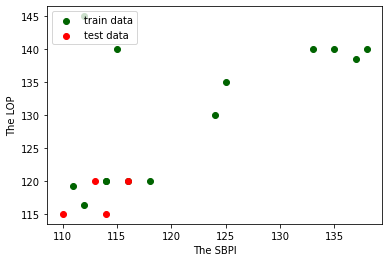

In [10]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.SBPI,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPI.shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#散點圖
plt.scatter(X_train, Y_train, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test, Y_test, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (18,) ；  訓練集: (14,) ；  測試集: (4,)
因變量---源數據: (18,) ；  訓練集: (14,) ；  測試集: (4,)


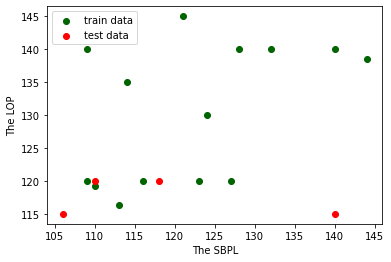

In [11]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(modTIP.SBPL,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPL.shape, "；  訓練集:",X_train2.shape, "；  測試集:",X_test2.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train2.shape, "；  測試集:",Y_test2.shape)
#散點圖
plt.scatter(X_train2, Y_train2, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test2, Y_test2, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPL")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (18,) ；  訓練集: (14,) ；  測試集: (4,)
因變量---源數據: (18,) ；  訓練集: (14,) ；  測試集: (4,)


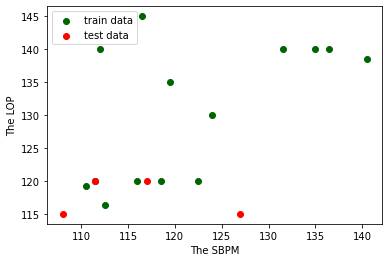

In [12]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(modTIP.SBPM,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBPM.shape, "；  訓練集:",X_train3.shape, "；  測試集:",X_test3.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train3.shape, "；  測試集:",Y_test3.shape)
#散點圖
plt.scatter(X_train3, Y_train3, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test3, Y_test3, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPM")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

In [13]:
# plt.scatter(modTIP.SBP1, modTIP.TIP, color="darkgreen", label="分布")

In [14]:
# X_1 = np.array([1 for i in range(28)])
# x_train = np.array(X_train)
# x = np.zeros((28,2))
# x[:,0] = X_1
# x[:,1] = x_train
# #線性迴歸訓練
# model = LinearRegression()
# model.fit(x,Y_train)#調用線性迴歸包
# a  = model.intercept_#截距
# b = model.coef_#迴歸係數
# #訓練數據的預測值
# y_train_pred = model.predict(x)
# #繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
# plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
# #測試數據散點圖
# plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
# plt.scatter(X_test, Y_test, color='red', label="test data")
# #添加圖標標籤
# plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
# plt.xlabel("The SBP")#添加 X 軸名稱
# plt.ylabel("The TIP")#添加 Y 軸名稱
# plt.show()#顯示圖像
# print("擬合參數:截距",a,",迴歸係數：",b)
# print("最佳擬合線: Y = ",round(a,2),"+",round(b[1],2),"* X")
# #顯示線性方程，並限制參數的小數位爲兩位

In [15]:
q = np.array(X_train)#q原先shape是(28,0)
np.shape(q)
q = np.reshape(q, (14,1))#reshape換成(28,1)

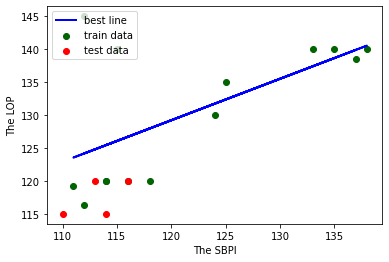

擬合參數:截距 53.73418006430869 ,迴歸係數： [0.62900322]
最佳擬合線: Y =  53.73 + 0.63 * X


In [16]:
model = LinearRegression()
model.fit(q,Y_train)#調用線性迴歸包
# model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#迴歸係數
#訓練數據的預測值
y_train_pred = model.predict(q)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train, y_train_pred, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPI")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a,",迴歸係數：",b)
print("最佳擬合線: Y = ",round(a,2),"+",round(b[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位

In [17]:
q2 = np.array(X_train2)#q原先shape是(28,0)
np.shape(q2)
q2 = np.reshape(q2, (14,1))#reshape換成(28,1)

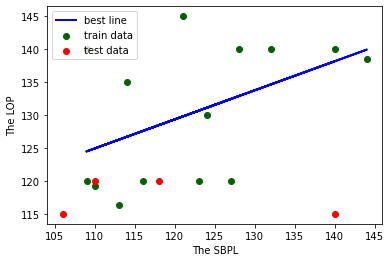

擬合參數:截距 76.36205512909979 ,迴歸係數： [0.44153873]
最佳擬合線: Y =  76.36 + 0.44 * X


In [18]:
model2 = LinearRegression()
model2.fit(q2,Y_train2)#調用線性迴歸包
# model.fit(X_train,Y_train)
a2  = model2.intercept_#截距
b2 = model2.coef_#迴歸係數
#訓練數據的預測值
y_train_pred2 = model2.predict(q2)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train2, y_train_pred2, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train2, Y_train2, color='darkgreen', label="train data")
plt.scatter(X_test2, Y_test2, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPL")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a2,",迴歸係數：",b2)
print("最佳擬合線: Y = ",round(a2,2),"+",round(b2[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位

In [19]:
q3 = np.array(X_train3)#q原先shape是(28,0)
np.shape(q3)
q3 = np.reshape(q3, (14,1))#reshape換成(28,1)

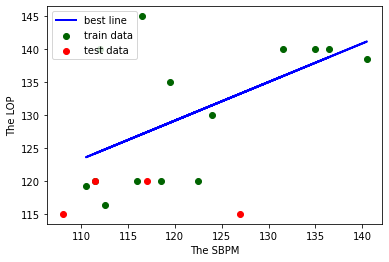

擬合參數:截距 58.90181058495821 ,迴歸係數： [0.58551532]
最佳擬合線: Y =  58.9 + 0.59 * X


In [20]:
model3 = LinearRegression()
model3.fit(q3,Y_train3)#調用線性迴歸包
# model.fit(X_train,Y_train)
a3  = model3.intercept_#截距
b3 = model3.coef_#迴歸係數
#訓練數據的預測值
y_train_pred3 = model3.predict(q3)
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(X_train3, y_train_pred3, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train3, Y_train3, color='darkgreen', label="train data")
plt.scatter(X_test3, Y_test3, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBPM")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a3,",迴歸係數：",b3)
print("最佳擬合線: Y = ",round(a3,2),"+",round(b3[0],2),"* X")
#顯示線性方程，並限制參數的小數位爲兩位